<a href="https://colab.research.google.com/github/shahdhruv29/woc5.0-ml-weather-prediction-case-study-dhruvshah29/blob/main/Checkpoint8_Woc5_0_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
df= pd.read_csv('/content/weather.csv')
df = df.sample(frac = 1)
print(df.head())

      precipitation  temp_max  temp_min  wind weather
380             0.0       6.7      -0.6   2.3     sun
813             0.0      18.9       2.8   2.2     sun
388             5.1       7.2       2.2   3.1    rain
155             1.3      12.8       8.9   3.1    rain
1409            1.3      11.1       3.9   3.9    rain


In [79]:
print(df)

      precipitation  temp_max  temp_min  wind weather
380             0.0       6.7      -0.6   2.3     sun
813             0.0      18.9       2.8   2.2     sun
388             5.1       7.2       2.2   3.1    rain
155             1.3      12.8       8.9   3.1    rain
1409            1.3      11.1       3.9   3.9    rain
...             ...       ...       ...   ...     ...
334            35.6      15.0       7.8   4.6    rain
179             0.0      22.2      11.7   2.5    rain
1309            0.0      30.6      16.1   2.0     sun
571             0.0      31.1      12.8   2.3     sun
639             7.9      14.4       8.9   4.7    rain

[1461 rows x 5 columns]


In [80]:
print(df.dtypes)

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object


In [81]:
df['temp_avg'] = (df['temp_max']+ df['temp_max'])/2

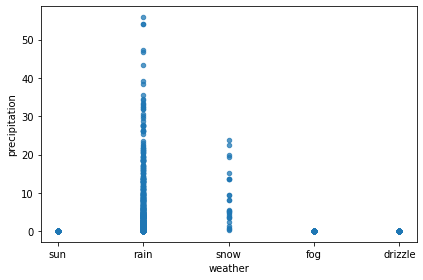

In [82]:
df.plot.scatter(x="weather", y="precipitation",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

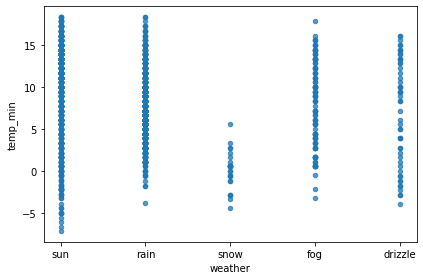

In [83]:
df.plot.scatter(x="weather", y="temp_min",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

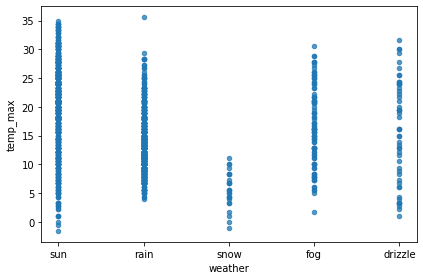

In [84]:
df.plot.scatter(x="weather", y="temp_max",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

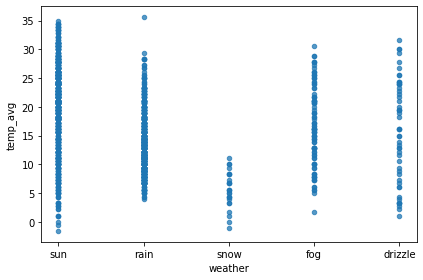

In [85]:
df.plot.scatter(x="weather", y="temp_avg",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

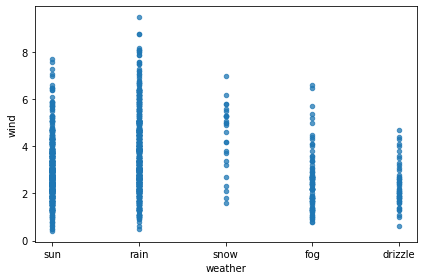

In [86]:
df.plot.scatter(x="weather", y="wind",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
def to_category(col):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
to_category('weather')

In [89]:
X=df[['precipitation','temp_max', 'temp_min', 'wind', 'temp_max']]
y=df['weather']

In [90]:
print(X)
# print(y)

      precipitation  temp_max  temp_min  wind  temp_max
380             0.0       6.7      -0.6   2.3       6.7
813             0.0      18.9       2.8   2.2      18.9
388             5.1       7.2       2.2   3.1       7.2
155             1.3      12.8       8.9   3.1      12.8
1409            1.3      11.1       3.9   3.9      11.1
...             ...       ...       ...   ...       ...
334            35.6      15.0       7.8   4.6      15.0
179             0.0      22.2      11.7   2.5      22.2
1309            0.0      30.6      16.1   2.0      30.6
571             0.0      31.1      12.8   2.3      31.1
639             7.9      14.4       8.9   4.7      14.4

[1461 rows x 5 columns]


In [91]:
print(y.value_counts()) #2-rain, 4-sun, 1-fog, 0-drizzle, 3-snow

2    641
4    640
1    101
0     53
3     26
Name: weather, dtype: int64


# Build an ANN

In [115]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import Activation, Dense

In [116]:
model = tf.keras.models.Sequential([
    Dense(150,input_shape=(5,),activation='relu'),
    Dense(100,activation='relu'),
    Dense(100,activation='relu'),
    Dense(75,activation='relu'),
    Dense(50,activation='relu'),
    Dense(5,activation='softmax')
])

In [117]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 150)               900       
                                                                 
 dense_25 (Dense)            (None, 100)               15100     
                                                                 
 dense_26 (Dense)            (None, 100)               10100     
                                                                 
 dense_27 (Dense)            (None, 75)                7575      
                                                                 
 dense_28 (Dense)            (None, 50)                3800      
                                                                 
 dense_29 (Dense)            (None, 5)                 255       
                                                                 
Total params: 37,730
Trainable params: 37,730
Non-trai

In [118]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=10)
print(len(X_train), len(X_test))

1168 293


In [119]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy() # As we have used the soft-max function in the model to make our loss more numerically stable.

In [120]:
model.compile(loss =loss_fn, optimizer = 'adam', metrics = ['accuracy'])

In [121]:
model.fit(X_train, y_train, epochs=30, batch_size=200)

Epoch 1/30
6/6 [==============================] - 1s 6ms/step - loss: 1.1927 - accuracy: 0.5411
Epoch 2/30
6/6 [==============================] - 0s 5ms/step - loss: 0.8850 - accuracy: 0.7226
Epoch 3/30
6/6 [==============================] - 0s 5ms/step - loss: 0.7626 - accuracy: 0.7509
Epoch 4/30
6/6 [==============================] - 0s 5ms/step - loss: 0.7032 - accuracy: 0.7697
Epoch 5/30
6/6 [==============================] - 0s 6ms/step - loss: 0.6547 - accuracy: 0.7774
Epoch 6/30
6/6 [==============================] - 0s 5ms/step - loss: 0.6241 - accuracy: 0.7860
Epoch 7/30
6/6 [==============================] - 0s 5ms/step - loss: 0.6281 - accuracy: 0.7834
Epoch 8/30
6/6 [==============================] - 0s 5ms/step - loss: 0.5956 - accuracy: 0.8022
Epoch 9/30
6/6 [==============================] - 0s 6ms/step - loss: 0.6010 - accuracy: 0.7902
Epoch 10/30
6/6 [==============================] - 0s 6ms/step - loss: 0.6080 - accuracy: 0.7945
Epoch 11/30
6/6 [======================

In [122]:
_, accuracy = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.7260 - accuracy: 0.8020


In [108]:
Dict = {0:'drizzle',1:'fog',2:'sun',3:'snow',4:'sun'} #2-rain, 4-sun, 1-fog, 0-drizzle, 3-snow

In [124]:
y_pred = model.predict(X_test)
print(y_pred)

10/10 [==============================] - 0s 2ms/step
[[3.3743101e-01 9.3311243e-02 4.3878119e-02 1.8433442e-02 5.0694615e-01]
 [3.1156059e-02 6.5604515e-02 1.5596991e-03 9.1935834e-07 9.0167880e-01]
 [2.2897178e-02 6.4855523e-02 2.6325430e-04 9.1228515e-08 9.1198391e-01]
 ...
 [9.6745983e-02 1.9623689e-01 2.9050246e-02 9.7792852e-04 6.7698896e-01]
 [2.4801591e-06 1.2838311e-06 9.9724245e-01 2.7191152e-03 3.4602555e-05]
 [1.6519465e-06 7.6610689e-07 9.9616349e-01 3.8085212e-03 2.5604142e-05]]


In [125]:
y_pred = np.argmax(y_pred, axis=-1)
print(y_pred)

[4 4 4 4 4 4 2 4 2 2 2 4 2 2 2 4 4 2 4 4 4 4 2 4 4 4 4 4 4 2 4 4 2 2 4 2 4
 4 4 2 4 4 4 4 4 4 2 2 2 4 4 4 2 2 4 4 4 4 4 2 4 2 4 4 4 4 2 2 4 2 4 2 4 4
 4 2 4 4 2 2 4 4 4 2 3 4 4 4 4 2 2 4 2 2 4 4 2 4 2 4 2 4 4 4 4 4 2 4 4 2 2
 4 4 4 4 4 4 4 2 4 4 4 2 4 2 4 4 2 4 4 2 4 4 4 2 2 2 4 4 2 2 4 4 4 4 4 2 4
 4 4 2 3 4 4 2 4 4 2 4 4 4 4 4 4 2 4 4 2 4 2 2 2 2 4 4 2 2 2 4 2 4 4 2 4 2
 2 4 4 4 4 4 2 2 4 4 2 2 4 2 2 4 4 4 4 4 4 4 4 2 2 2 2 2 4 4 4 4 4 4 2 4 4
 2 4 2 4 4 4 2 2 4 2 4 4 2 2 4 4 4 4 2 4 4 2 4 3 2 4 4 4 2 4 2 4 4 4 4 4 4
 2 4 2 4 3 4 2 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2]


In [131]:
from sklearn import metrics
cm= metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   0  10]
 [  0   0   0   0  18]
 [  0   0  94   0  28]
 [  0   0   2   4   0]
 [  0   0   0   0 137]]


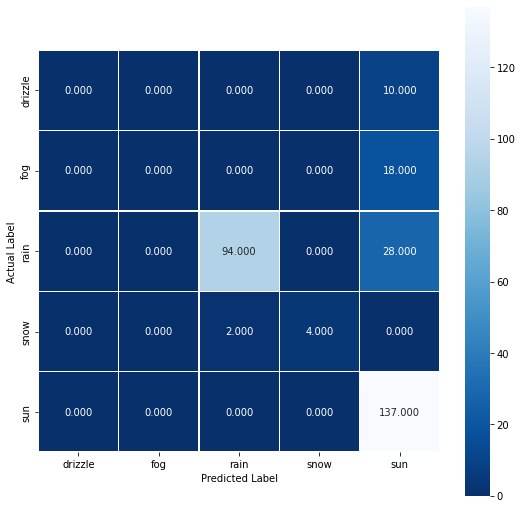

In [134]:
import seaborn as sns
plt.figure(figsize=(9,9))
labels=['drizzle', 'fog', 'rain', 'snow', 'sun'] #2-rain, 4-sun, 1-fog, 0-drizzle, 3-snow
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)